In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score,RandomizedSearchCV

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import imblearn
from imblearn.over_sampling import RandomOverSampler
# To impute missing values
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler

# To help with model building
from sklearn.linear_model import LogisticRegression
#to build SVM model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [2]:
#setting matplotlib default
sns.set_theme(color_codes=True)
sns.set_style('ticks')

In [3]:
#reading data
data=pd.read_csv('C:/Users/user/Downloads/heart_failure_clinical_records_dataset.csv')

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00000,0,582,0,20,1,265000.00000,1.90000,130,1,0,4,1
1,55.00000,0,7861,0,38,0,263358.03000,1.10000,136,1,0,6,1
2,65.00000,0,146,0,20,0,162000.00000,1.30000,129,1,1,7,1
3,50.00000,1,111,0,20,0,210000.00000,1.90000,137,1,0,7,1
4,65.00000,1,160,1,20,0,327000.00000,2.70000,116,0,0,8,1


In [5]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.00000,0,61,1,38,1,155000.00000,1.10000,143,1,1,270,0
295,55.00000,0,1820,0,38,0,270000.00000,1.20000,139,0,0,271,0
296,45.00000,0,2060,1,60,0,742000.00000,0.80000,138,0,0,278,0
297,45.00000,0,2413,0,38,0,140000.00000,1.40000,140,1,1,280,0
298,50.00000,0,196,0,45,0,395000.00000,1.60000,136,1,1,285,0


In [6]:
#checking for duplicated data
data.duplicated().sum()

0

In [7]:
df=data.copy()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
def corect(colums):
    for i in colums:
        if i==1:
            return 'male'
        else:
            return 'female'

In [11]:
df['sex']=df[['sex']].apply(corect,axis=1)

In [12]:
def cor(colums):
    for i in colums:
        if i==1:
            return 'yes'
        else:
            return 'no'


In [13]:
df['smoking']=df[['smoking']].apply(cor,axis=1).astype('str')

In [14]:
df['diabetes']=df[['diabetes']].apply(cor,axis=1).astype('str')

In [15]:
df['DEATH_EVENT']=df[['DEATH_EVENT']].apply(cor,axis=1).astype('str')

In [16]:
df['anaemia']=df[['anaemia']].apply(cor,axis=1).astype('str')

In [17]:
df['high_blood_pressure']=df[['high_blood_pressure']].apply(cor,axis=1).astype('str')

In [18]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00000,no,582,no,20,yes,265000.00000,1.90000,130,male,no,4,yes
1,55.00000,no,7861,no,38,no,263358.03000,1.10000,136,male,no,6,yes
2,65.00000,no,146,no,20,no,162000.00000,1.30000,129,male,yes,7,yes
3,50.00000,yes,111,no,20,no,210000.00000,1.90000,137,male,no,7,yes
4,65.00000,yes,160,yes,20,no,327000.00000,2.70000,116,female,no,8,yes


In [19]:
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.00000,299.00000,299.00000,299.00000,299.00000,299.00000,299.00000
mean,60.83389,581.83946,38.08361,263358.02926,1.39388,136.62542,130.26087
std,11.89481,970.28788,11.83484,97804.23687,1.03451,4.41248,77.61421
min,40.00000,23.00000,14.00000,25100.00000,0.50000,113.00000,4.00000
25%,51.00000,116.50000,30.00000,212500.00000,0.90000,134.00000,73.00000
50%,60.00000,250.00000,38.00000,262000.00000,1.10000,137.00000,115.00000
75%,70.00000,582.00000,45.00000,303500.00000,1.40000,140.00000,203.00000
max,95.00000,7861.00000,80.00000,850000.00000,9.40000,148.00000,285.00000


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


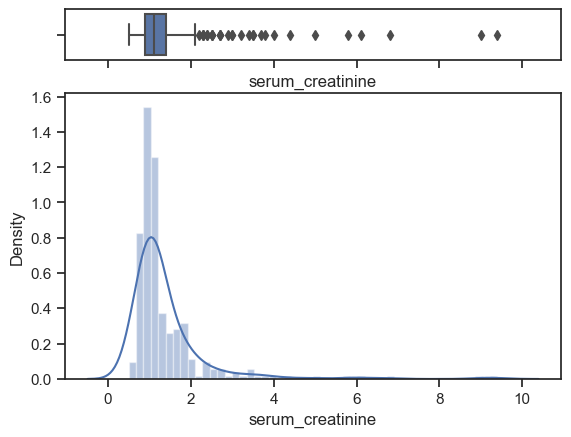

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

In [20]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["serum_creatinine"], ax=ax_box)
sns.distplot(data["serum_creatinine"], ax=ax_hist)
ax_box.set(xlabel='serum_creatinine')
plt.show()
plt.figure(figsize=(3,2))



C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


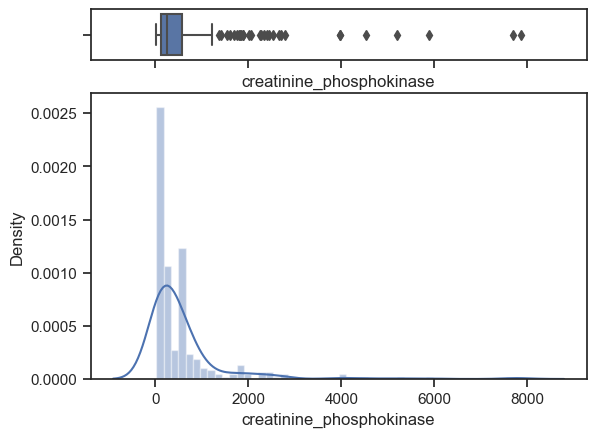

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

In [21]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["creatinine_phosphokinase"], ax=ax_box)
sns.distplot(df["creatinine_phosphokinase"], ax=ax_hist)
ax_box.set(xlabel='creatinine_phosphokinase')
plt.show()
plt.figure(figsize=(3,2))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


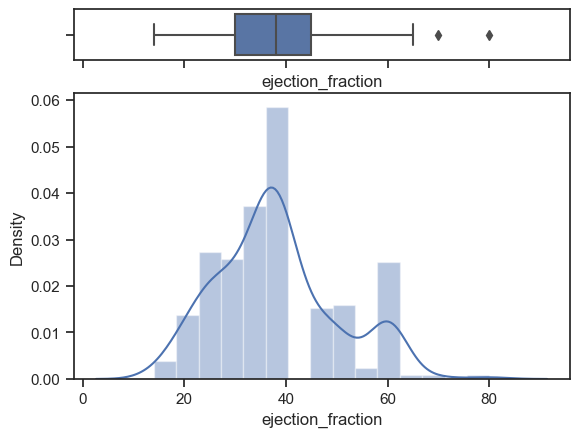

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

In [22]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["ejection_fraction"], ax=ax_box)
sns.distplot(df["ejection_fraction"], ax=ax_hist)
ax_box.set(xlabel='ejection_fraction')
plt.show()
plt.figure(figsize=(3,2))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


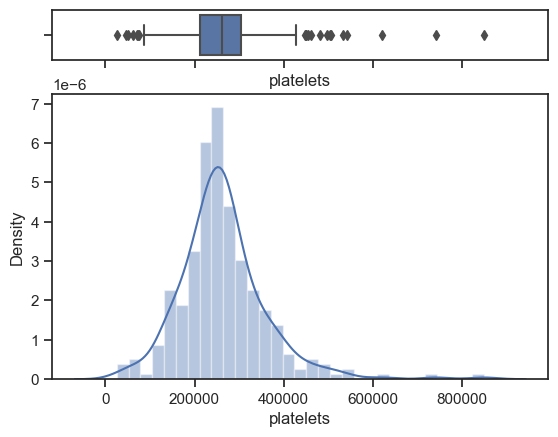

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

In [23]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["platelets"], ax=ax_box)
sns.distplot(df["platelets"], ax=ax_hist)
ax_box.set(xlabel='platelets')
plt.show()
plt.figure(figsize=(3,2))

In [24]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [25]:
(
    (df.select_dtypes(include=["float64", "int64"]) < lower)
    | (df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100


C:\Users\user\AppData\Local\Temp\ipykernel_20868\3495899826.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df.select_dtypes(include=["float64", "int64"]) < lower)
C:\Users\user\AppData\Local\Temp\ipykernel_20868\3495899826.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  | (df.select_dtypes(include=["float64", "int64"]) > upper)


DEATH_EVENT                0.00000
age                        0.00000
anaemia                    0.00000
creatinine_phosphokinase   9.69900
diabetes                   0.00000
ejection_fraction          0.66890
high_blood_pressure        0.00000
platelets                  7.02341
serum_creatinine           9.69900
serum_sodium               1.33779
sex                        0.00000
smoking                    0.00000
time                       0.00000
dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 30.5+ KB


<AxesSubplot:>

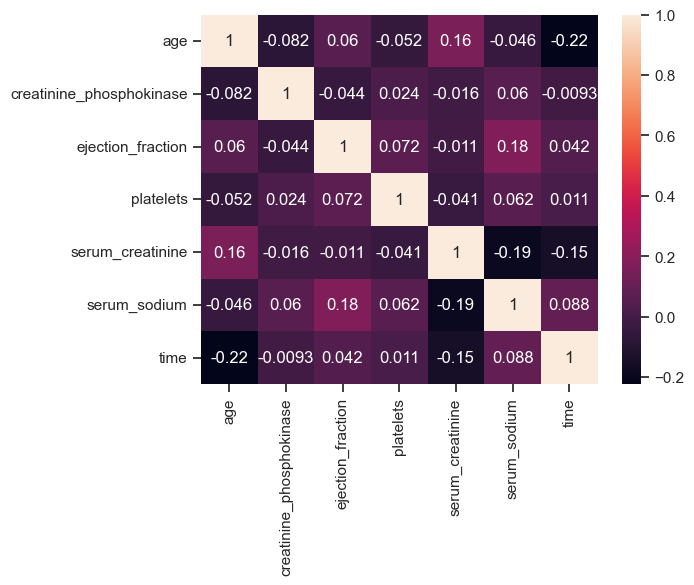

In [27]:
sns.heatmap(df.corr(),annot=True)

In [28]:
df['DEATH_EVENT'].value_counts()

no     203
yes     96
Name: DEATH_EVENT, dtype: int64

Text(0, 0.5, 'death percntage%')

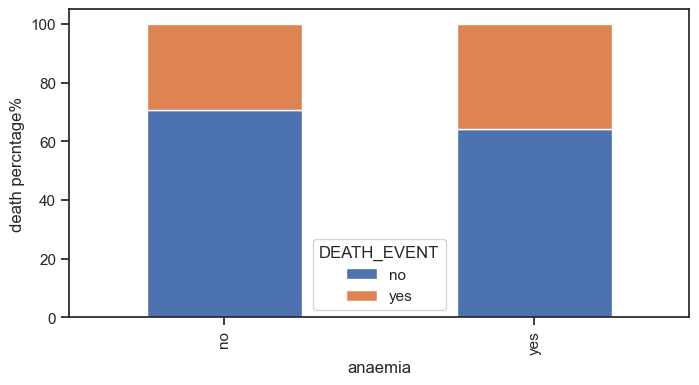

In [29]:
(pd.crosstab(df['anaemia'],df['DEATH_EVENT'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('death percntage%')


Text(0, 0.5, 'death percntage %')

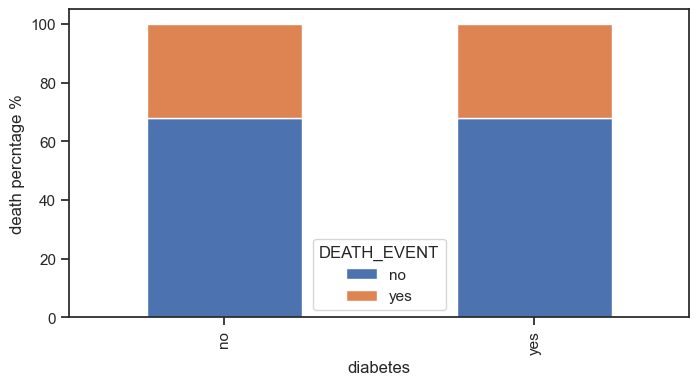

In [30]:
(pd.crosstab(df['diabetes'],df['DEATH_EVENT'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('death percntage %')

Text(0, 0.5, 'death percntage %')

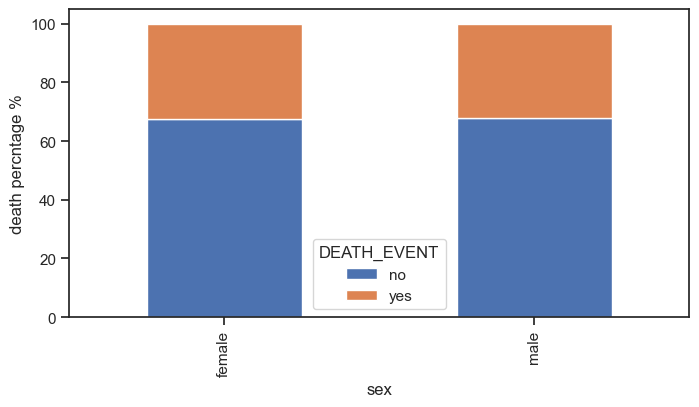

In [31]:
(pd.crosstab(df['sex'],df['DEATH_EVENT'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('death percntage %')

Text(0, 0.5, 'death percntage %')

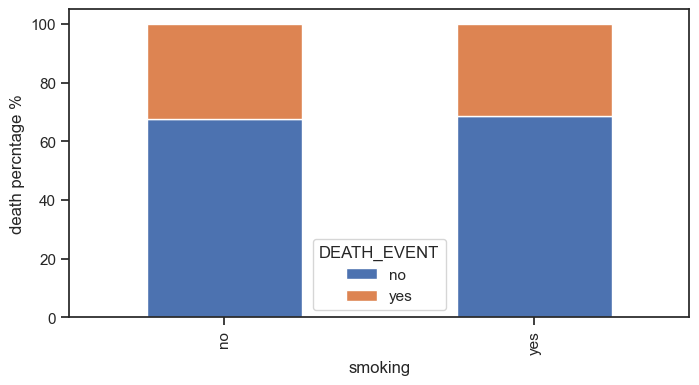

In [32]:
(pd.crosstab(df['smoking'],df['DEATH_EVENT'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('death percntage %')

In [33]:
df=pd.get_dummies(df,prefix=['smoking','diabetes','sex','anaemia','high_blood_pressure'],columns=['smoking','diabetes','sex','anaemia','high_blood_pressure'],drop_first=True)
df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,smoking_yes,diabetes_yes,sex_male,anaemia_yes,high_blood_pressure_yes
0,75.00000,582,20,265000.00000,1.90000,130,4,yes,0,0,1,0,1
1,55.00000,7861,38,263358.03000,1.10000,136,6,yes,0,0,1,0,0
2,65.00000,146,20,162000.00000,1.30000,129,7,yes,1,0,1,0,0
3,50.00000,111,20,210000.00000,1.90000,137,7,yes,0,0,1,1,0
4,65.00000,160,20,327000.00000,2.70000,116,8,yes,0,1,0,1,0


In [34]:
df["DEATH_EVENT"].replace("no", 0, inplace=True)
df["DEATH_EVENT"].replace("yes", 1, inplace=True)


In [35]:
df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,smoking_yes,diabetes_yes,sex_male,anaemia_yes,high_blood_pressure_yes
0,75.00000,582,20,265000.00000,1.90000,130,4,1,0,0,1,0,1
1,55.00000,7861,38,263358.03000,1.10000,136,6,1,0,0,1,0,0
2,65.00000,146,20,162000.00000,1.30000,129,7,1,1,0,1,0,0
3,50.00000,111,20,210000.00000,1.90000,137,7,1,0,0,1,1,0
4,65.00000,160,20,327000.00000,2.70000,116,8,1,0,1,0,1,0


In [36]:
xa=df.drop('DEATH_EVENT',axis=1)
ya=df['DEATH_EVENT']

In [37]:
rus = RandomOverSampler(random_state=42, )
x,y= rus.fit_resample(xa,ya)

In [38]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [39]:
x.shape

(406, 12)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [41]:
lg=LogisticRegression()


In [42]:
lg.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
pred=lg.predict(x_train)

In [44]:
from sklearn.preprocessing import Binarizer



In [45]:
lg.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
pre=lg.predict(x_test)

              precision    recall  f1-score   support

           0       0.68      0.88      0.77        43
           1       0.89      0.69      0.78        59

    accuracy                           0.77       102
   macro avg       0.78      0.79      0.77       102
weighted avg       0.80      0.77      0.78       102



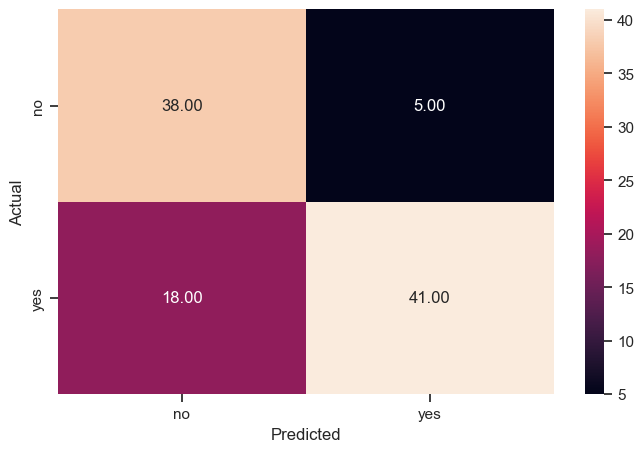

In [47]:
y_test_array = y_test.values
binarizer = Binarizer(threshold=0.5)
y_trains = binarizer.fit_transform(y_test_array.reshape(-1, 1))
predi = binarizer.fit_transform(pre.reshape(-1,1))
metrics_score(y_test,pre)

In [48]:
dtc=DecisionTreeClassifier()

In [49]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
pred=dtc.predict(x_test)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        43
           1       0.92      0.92      0.92        59

    accuracy                           0.90       102
   macro avg       0.90      0.90      0.90       102
weighted avg       0.90      0.90      0.90       102



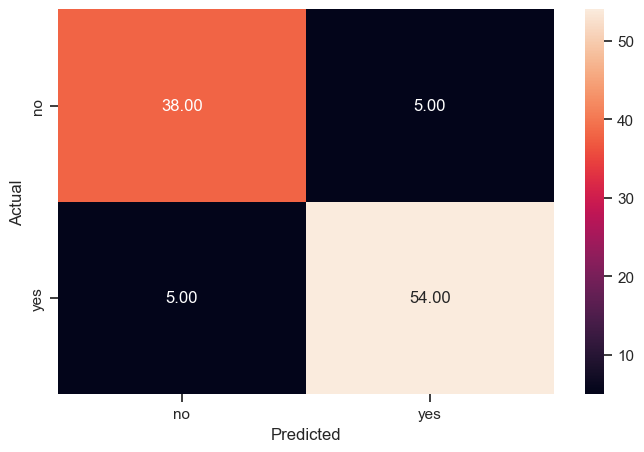

In [51]:
metrics_score(y_test,pred)

In [52]:
rfc=RandomForestClassifier()

In [53]:
rfc.fit(x_train,y_train)
ten=rfc.fit(x_train,y_train)

In [54]:
pred=rfc.predict(x_test)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.92      0.93      0.92        59

    accuracy                           0.91       102
   macro avg       0.91      0.91      0.91       102
weighted avg       0.91      0.91      0.91       102



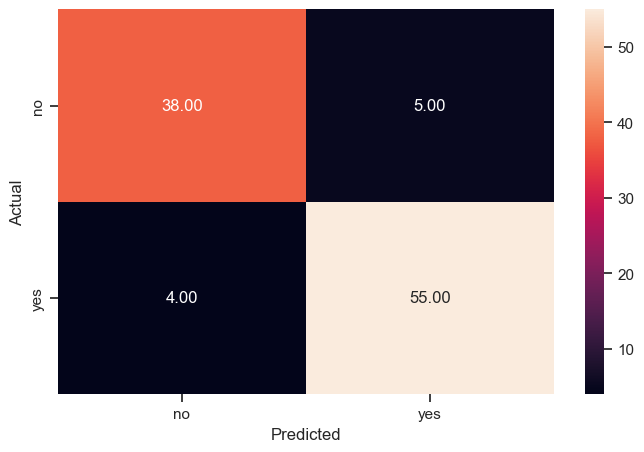

In [55]:
metrics_score(y_test,pred)

In [56]:
xg=XGBClassifier(learning_rate= 0.1, max_depth=4, n_estimators= 98)

In [60]:
# hyperparameter tuning
# Define the hyperparameter space
param_grid = {
    'n_estimators':range(10,100),
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
}

# Define the evaluation metric
eval_metric = 'accuracy'

# Define the grid search object
grid_search = GridSearchCV(
    estimator=xg,
    param_grid=param_grid,
    scoring=eval_metric,
    cv=5,
    n_jobs=-1
)

# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the best score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Test the model on the test set
test_score = grid_search.score(x_test, y_test)
print('Test score:', test_score)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 40}
Best score: 0.8881967213114755
Test score: 0.8823529411764706


In [57]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=98, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [58]:
predi=xg.predict(x_test)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.95      0.92      0.93        61

    accuracy                           0.92       102
   macro avg       0.92      0.92      0.92       102
weighted avg       0.92      0.92      0.92       102



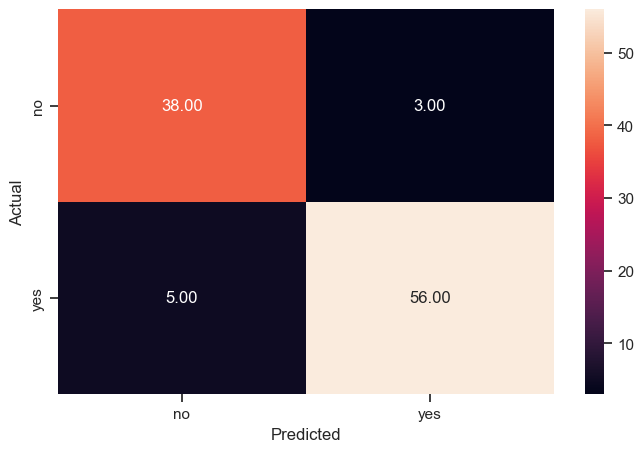

In [59]:
metrics_score(predi,y_test)